# Corneal OCT quantification 
## For "Haze" detection

In [1]:
from image_OCT import *
from image_Quantification import *
from matplotlib import pyplot as plt
import numpy as np
from scipy import interpolate
import os
from os import listdir
from os.path import isfile, join
import re

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
# plt.figure
# plt.savefig(os.path.join(savefold, 'coucou'+extension))

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


In [8]:
def plot_treatment(im):
	plt.figure()
	plt.subplot(221)
	plt.title("Input image")
	plt.imshow(im.OCT_brut,cmap="gray")
	plt.axis("off")
	plt.subplot(222)
	plt.title("Arrow removal")
	plt.imshow(im.OCT,cmap="gray")
	plt.axis("off")
	plt.subplot(223)
	plt.title("Exposure correction")
	plt.imshow(im.OCT_cut,cmap="gray")
	plt.axis("off")
	plt.subplot(224)
	plt.title("Flattening")
	plt.imshow(im.OCT_flat,cmap="gray")
	plt.axis("off")
	# plt.show()

def plot_profile(im,im_Q):
	plt.figure()
	res=im_Q.res
	peak=res[0];xmin=res[1];xmax=res[2];xlow1=res[3];xlow2=res[4];extractedProf=res[5]	
	plt.subplot(211)
	plt.imshow(im.OCT_flat.transpose(),cmap="gray",aspect="auto")
	plt.axis("off")
	plt.subplot(212)
	plt.plot(im_Q.intentityProfile)
	plt.xlim([0,im_Q.intentityProfile.shape[0]])
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	# plt.show()

def plot_quantification(im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")
	# plt.show()

def plot_extracted(im,im_Q):
	plt.figure()
	peak=im_Q.res[0];xmin=im_Q.res[1];xmax=im_Q.res[2];xlow1=im_Q.res[3];xlow2=im_Q.res[4];extractedProf=im_Q.res[5];cropedProfile=im_Q.res[6]
	plt.plot(peak,im_Q.intentityProfile[peak],'+')
	plt.plot([xlow1,xlow2],[im_Q.intentityProfile[xlow1],im_Q.intentityProfile[xlow2]],"r+")
	plt.plot(np.arange(xmin,xmax),cropedProfile)
	plt.legend(["Peaks","Peak width:"+str(xlow2-xlow1)+" px","Intensity profile"])
	plt.xlabel("depth (px)")
	plt.ylabel("intensity (a.u)")

def im_plot(im,type='OCT_brut'):
	plt.figure()
	if type=='OCT_brut':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT':
		plt.imshow(im.OCT_brut,cmap="gray",aspect="auto")
	elif type=='OCT_cut':
		plt.imshow(im.OCT_cut,cmap="gray",aspect="auto")
	elif type=='OCT_flat':
		plt.imshow(im.OCT_flat,cmap="gray",aspect="auto")
	else:
		print("Type not recognize")


## Example of profile extraction and fitting

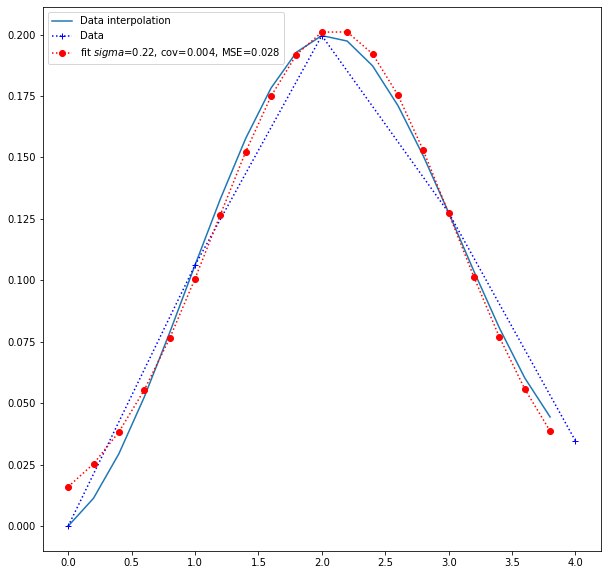

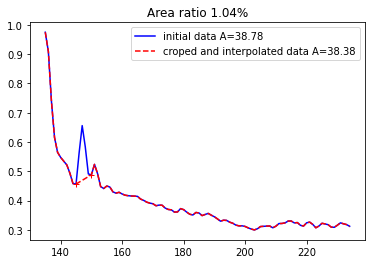

<Figure size 432x288 with 0 Axes>

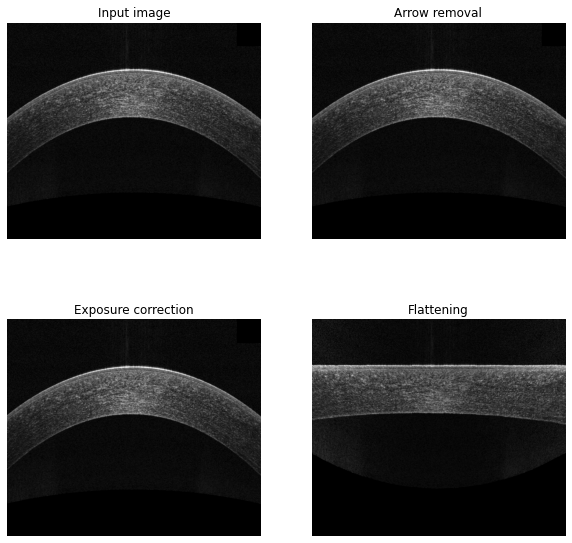

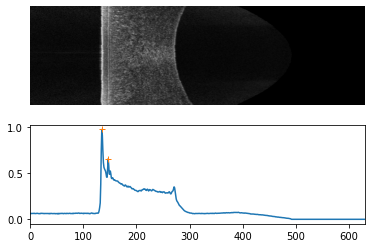

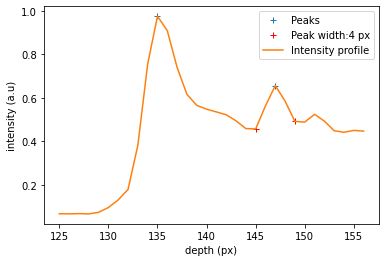

In [3]:
# filepathname=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
# filepathname=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
filepathname=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')

im=image_OCT(filepathname)
im.AutoTreatment()

plt.figure(figsize=(10,10))
im_Q=image_Quantification(im,True)
plt.savefig(savefold+"profile"+extension)

plt.figure(figsize=(10,10))
plot_treatment(im)
plt.savefig(savefold+"profile1"+extension)

plt.figure()
plot_profile(im,im_Q)
plt.savefig(savefold+"profile2"+extension)

plt.figure()
plot_quantification(im_Q)
plt.savefig(savefold+"profile3"+extension)
# plt.imshow(im.OCT_flat)
# filepathname="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/HAZE/haze 1.jpg"
# im=image_OCT(filepathname)
# im.AutoTreatment()
# im_Q=image_Quantification(im,plot=True)
# plot_profile(im,im_Q.res)
# plt.imshow(im.OCT_flat)

## Multi-image treatment

1 : haze 1.jpg
2 : haze 2.jpg
Error with: haze 3.jpg image #3
4 : haze 4.jpg
5 : haze 5.jpg
Error with: haze 6.jpg image #6
1 : 23923_BOULIS_OD.jpg
2 : 79296_BESNIC_OD.jpg
3 : 80552_CORANT_OD.jpg
4 : 80552_CORANT_OS.jpg
5 : 80553_DUMFAU_OD.jpg
6 : 80553_DUMFAU_OS.jpg
7 : 80608_REZAZK_OD.jpg
Error with: 80608_REZAZK_OS.jpg image #8
9 : 81225_GOLDIM_OD.jpg
10 : 81225_GOLDIM_OS.jpg
11 : 81232_VILMAE_OD.jpg
12 : 81232_VILMAE_OS.jpg


<Figure size 432x288 with 0 Axes>

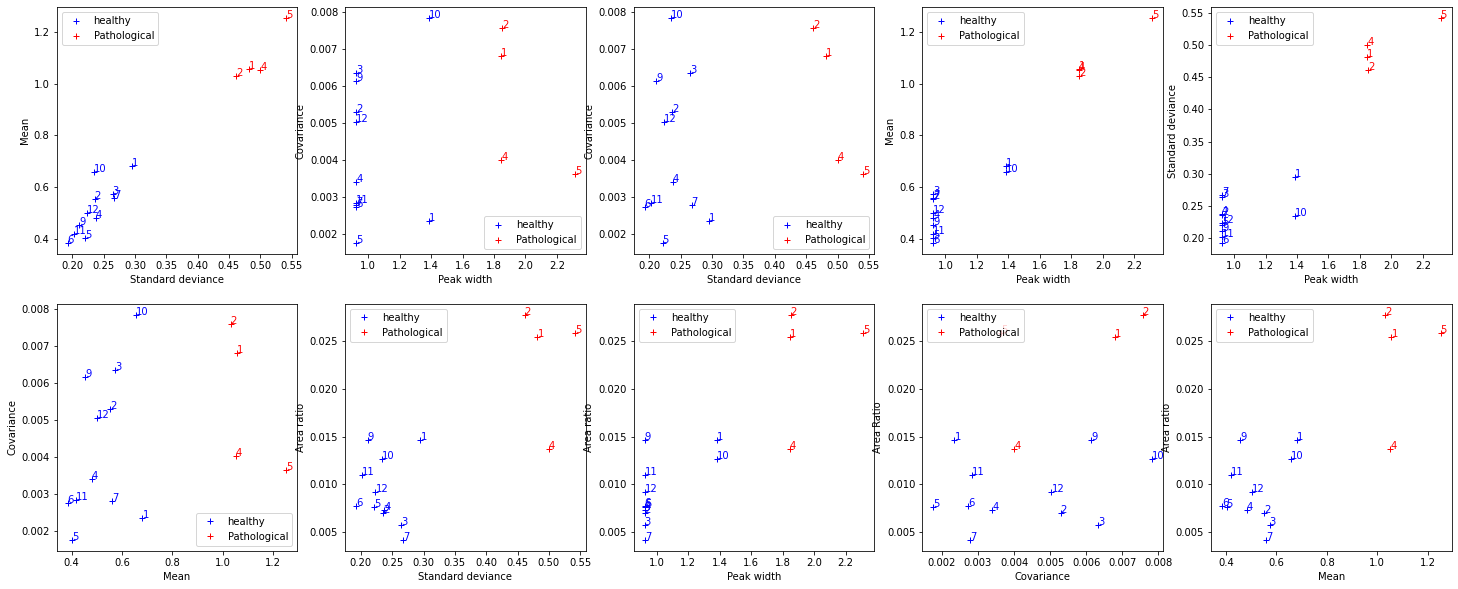

In [21]:
# repertory_haze="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/HAZE"
repertory_haze=os.path.join(dirname, 'Data','HAZE')
# repertory_healthy="C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Healthy"
repertory_healthy=os.path.join(dirname, 'Data','Healthy')
files_haze = [f for f in listdir(repertory_haze) if isfile(join(repertory_haze, f))]
files_healthy = [f for f in listdir(repertory_healthy) if isfile(join(repertory_healthy, f))]

quantification_haze=[]
i=0
i_list_haze=[]
for haze in files_haze:
	i+=1
	# im=image_OCT(repertory_haze+"\\"+haze)
	im=image_OCT(os.path.join(repertory_haze, haze))
	try:
		im.AutoTreatment()
		# res=im.Profile_quantification()
		im_Q=image_Quantification(im,False)

		# quantification=quantify(im,res,False)
		quantification=im_Q.param

		quantification_haze.append(quantification)
		print(i,":",haze)
		i_list_haze.append(i)
	except:
		print("Error with: "+haze+" image #"+str(i))

quantification_healthy=[]
i=0
i_list_healthy=[]
for healthy in files_healthy:
	i+=1
	# im=image_OCT(repertory_healthy+"\\"+healthy)
	im=image_OCT(os.path.join(repertory_healthy, healthy))
	try:
		im.AutoTreatment()
		# res=im.Profile_quantification()
		im_Q=image_Quantification(im,False)

		# quantification=quantify(im,res,False)
		quantification=im_Q.param
		
		quantification_healthy.append(quantification)
		print(i,":",healthy)
		i_list_healthy.append(i)
	except:
		print("Error with: "+healthy+" image #"+str(i))

X=quantification_healthy+quantification_haze
y=[1]*len(quantification_healthy)+[0]*len(quantification_haze)
plt.figure()
class1=(np.argwhere(np.array(y)==1).T[0])
x_class1=np.array([ np.array(X[index]) for index in class1])
class0=(np.argwhere(np.array(y)==0).T[0])
x_class0=np.array([ np.array(X[index]) for index in class0])

def textLabel(x_class0,x_class1,k,l):
	for i in range(x_class1.T[k].shape[0]): #healthy
		plt.text(x_class1.T[k][i],x_class1.T[l][i],str(i_list_healthy[i]),color="blue")
	for i in range(x_class0.T[k].shape[0]): #haze
		plt.text(x_class0.T[k][i],x_class0.T[l][i],str(i_list_haze[i]),color="red")
	
plt.figure(figsize=(25,10))
plt.subplot(251)
plt.plot(x_class1.T[1],x_class1.T[3],"b+",label="healthy")
plt.plot(x_class0.T[1],x_class0.T[3],"r+",label="Pathological")
textLabel(x_class0,x_class1,1,3)
plt.xlabel("Standard deviance")
plt.ylabel("Mean")
plt.legend()

plt.subplot(252)
plt.plot(x_class1.T[0],x_class1.T[2],"b+",label="healthy")
plt.plot(x_class0.T[0],x_class0.T[2],"r+",label="Pathological")
textLabel(x_class0,x_class1,0,2)
plt.xlabel("Peak width")
plt.ylabel("Covariance")
plt.legend()

plt.subplot(253)
plt.plot(x_class1.T[1],x_class1.T[2],"b+",label="healthy")
plt.plot(x_class0.T[1],x_class0.T[2],"r+",label="Pathological")
textLabel(x_class0,x_class1,1,2)
plt.xlabel("Standard deviance")
plt.ylabel("Covariance")
plt.legend()

plt.subplot(254)
plt.plot(x_class1.T[0],x_class1.T[3],"b+",label="healthy")
plt.plot(x_class0.T[0],x_class0.T[3],"r+",label="Pathological")
textLabel(x_class0,x_class1,0,3)
plt.xlabel("Peak width")
plt.ylabel("Mean")
plt.legend()

plt.subplot(255)
plt.plot(x_class1.T[0],x_class1.T[1],"b+",label="healthy")
plt.plot(x_class0.T[0],x_class0.T[1],"r+",label="Pathological")
textLabel(x_class0,x_class1,0,1)
plt.xlabel("Peak width")
plt.ylabel("Standard deviance")
plt.legend()

plt.subplot(256)
plt.plot(x_class1.T[3],x_class1.T[2],"b+",label="healthy")
plt.plot(x_class0.T[3],x_class0.T[2],"r+",label="Pathological")
textLabel(x_class0,x_class1,3,2)
plt.xlabel("Mean")
plt.ylabel("Covariance")
plt.legend()

plt.subplot(257)
plt.plot(x_class1.T[1],x_class1.T[5],"b+",label="healthy")
plt.plot(x_class0.T[1],x_class0.T[5],"r+",label="Pathological")
textLabel(x_class0,x_class1,1,5)
plt.xlabel("Standard deviance")
plt.ylabel("Area ratio")
plt.legend()

plt.subplot(258)
plt.plot(x_class1.T[0],x_class1.T[5],"b+",label="healthy")
plt.plot(x_class0.T[0],x_class0.T[5],"r+",label="Pathological")
textLabel(x_class0,x_class1,0,5)
plt.xlabel("Peak width")
plt.ylabel("Area ratio")
plt.legend()

plt.subplot(259)
plt.plot(x_class1.T[2],x_class1.T[5],"b+",label="healthy")
plt.plot(x_class0.T[2],x_class0.T[5],"r+",label="Pathological")
textLabel(x_class0,x_class1,2,5)
plt.xlabel("Covariance")
plt.ylabel("Area Ratio")
plt.legend()

plt.subplot(2,5,10)
plt.plot(x_class1.T[3],x_class1.T[5],"b+",label="healthy")
plt.plot(x_class0.T[3],x_class0.T[5],"r+",label="Pathological")
textLabel(x_class0,x_class1,3,5)
plt.xlabel("Mean")
plt.ylabel("Area ratio")
plt.legend()

plt.show()

X = np.array([ x for x in X])

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\HAZE\haze 5.jpg


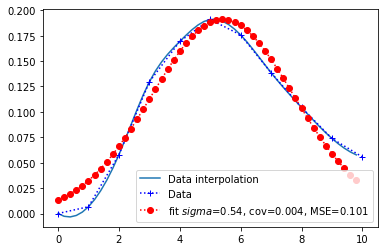

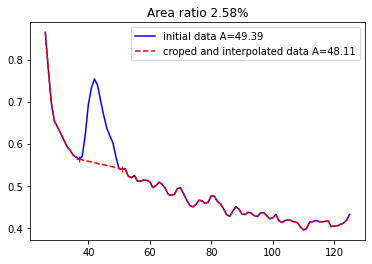

c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent\Data\Healthy\80553_DUMFAU_OD.jpg


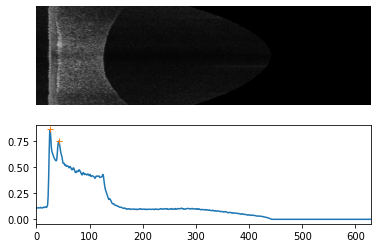

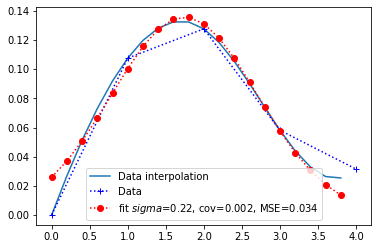

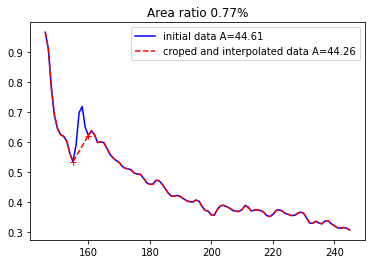

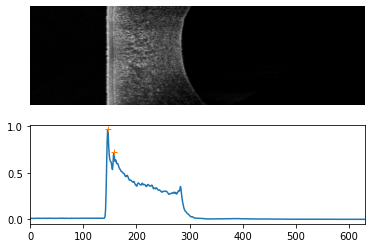

In [20]:
i=4
im=image_OCT(os.path.join(repertory_haze, files_haze[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification(im,True)
plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')

plt.figure()
i=4
im=image_OCT(os.path.join(repertory_healthy, files_healthy[i]))
print(im.Path)
im.AutoTreatment()
im_Q=image_Quantification(im,True)
plot_profile(im,im_Q)
# im_plot(im,type='OCT_flat')


In [22]:
from sklearn import svm
X=np.array( [ np.array(x) for x in X])
clf = svm.SVC()
clf.fit(X, y)
y_pred=clf.predict(X)
print(X)
print(y_pred)
print(len(y_pred))
print(y)

[[1.38472190e+00 2.95019521e-01 2.34776256e-03 6.81423466e-01
  6.24462909e-02 1.46434270e-02]
 [9.23147934e-01 2.35861901e-01 5.29245430e-03 5.52624067e-01
  5.22643791e-02 6.99235381e-03]
 [9.23147934e-01 2.64361653e-01 6.34099903e-03 5.72700409e-01
  6.24893414e-02 5.71388118e-03]
 [9.23147934e-01 2.37247675e-01 3.40131470e-03 4.81308310e-01
  4.35422190e-02 7.32602938e-03]
 [9.23147934e-01 2.21031076e-01 1.76275562e-03 4.02611849e-01
  3.42992435e-02 7.67201804e-03]
 [9.23147934e-01 1.92515965e-01 2.73682751e-03 3.84025475e-01
  3.28677158e-02 7.71488030e-03]
 [9.23147934e-01 2.67378436e-01 2.79201137e-03 5.59805958e-01
  5.63438457e-02 4.21548033e-03]
 [9.23147934e-01 2.10786749e-01 6.14550321e-03 4.54968150e-01
  3.39577909e-02 1.46779444e-02]
 [1.38472190e+00 2.34008197e-01 7.82684630e-03 6.56679484e-01
  6.30807360e-02 1.26338290e-02]
 [9.23147934e-01 2.02412737e-01 2.83768302e-03 4.18532694e-01
  2.56952712e-02 1.09326642e-02]
 [9.23147934e-01 2.23340351e-01 5.03691751e-03 5.0